# Mnist dataset using PCA and K-means model

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# read the data
X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
y_mnist = y_mnist.astype(int)

In [28]:
X_mnist.shape

(70000, 784)

In [5]:
#1) keep only the digits 7,8, and 9.
X_train = X_mnist[(y_mnist > 6) & (y_mnist < 10)]
y_train = y_mnist[(y_mnist > 6) & (y_mnist < 10)]

In [19]:
print("Dimension before PCA = " + str(X_train.shape))

Dimension before PCA = (21076, 784)


In [13]:
# 2) Transform the data using principal component analysis (PCA) and keep only the first two components
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)

In [18]:
print("Number of components before PCA  = " + str(X_train.shape[1]))

print(f'Total number of components used after PCA : {pca.n_components_}')

print("Dimension of our data after PCA = " + str(X_train_pca.shape))

Number of components before PCA  = 784
Total number of components used after PCA : 2
Dimension of our data after PCA = (21076, 2)


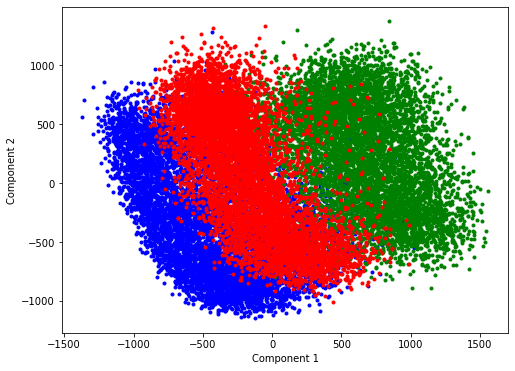

In [8]:
# 3) Visualize the data by plotting the two components of each class. Use ”component 1” as the x-axis and
#”component 2” as the y-axis of your plot
fig = plt.figure(figsize=(8,6))
plt.plot(X_train_pca[y_train == 7, 0], X_train_pca[y_train == 7, 1], "b.")
plt.plot(X_train_pca[y_train == 8, 0], X_train_pca[y_train == 8, 1], "g.")
plt.plot(X_train_pca[y_train == 9, 0], X_train_pca[y_train == 9, 1], "r.")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [9]:
# 4) Use the transformed data to train several K-Means clusterers with 2 to 10 clusters and calculate the
#silhouette score of each one.
k_range = range(2, 11)
kmeans_per_k = []
for k in k_range:
    print(f"Training {k = }")
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

Training k = 2
Training k = 3
Training k = 4
Training k = 5
Training k = 6
Training k = 7
Training k = 8
Training k = 9
Training k = 10


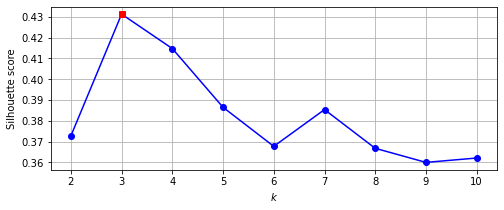

In [10]:
# calculate the silouette score.
silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]

# 5) What is the number of clusters that best fits the data? Does this number agree with the number of
#digits in the data?
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]

# the score of the best model
best_score = silhouette_scores[best_index]

# plot the silouette score as a function of the number of clusters, and the score of the best model.
plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

In [11]:
# 6) For the best K-Means model find the center of each cluster and construct and plot a representative
#image of each cluster
best_model = kmeans_per_k[best_index]
best_model.cluster_centers_

array([[-512.92926503,  388.80004318],
       [ 685.76292306,  219.51840334],
       [-135.80499536, -540.86068843]])

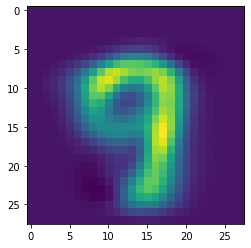

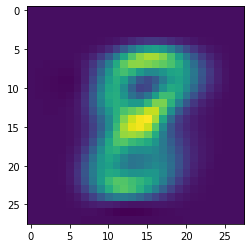

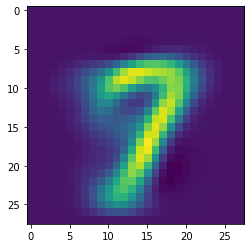

In [12]:
# construct the image using inverse transform of the pca components and plot the images
for center in best_model.cluster_centers_:
    img = pca.inverse_transform(center)
    plt.imshow(img.reshape(28,28))
    plt.show()